In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud

In [2]:
# Cargamos los datos
maps = pd.read_csv("./MJ_preprocesado_maps.csv", encoding = "utf8")
trip = pd.read_csv("./MJ_preprocesado_trip.csv", encoding = "utf8")

In [3]:
maps.head(1)

,Unnamed: 0,Descripción,Año,Mes,retroalimentacion
0,0,Simplemente mejores experiecias hospedaje vist...,2020,10,1


In [4]:
trip.head(1)

,Unnamed: 0,opinion,mes,año,retroalimentacion
0,0,detrás Catedral estaciones metro cerca camina...,9,2019,0


In [5]:
maps.dropna(inplace = True)
trip.dropna(inplace = True)

In [6]:
# Reseteamos index
trip.reset_index(inplace = True)
maps.reset_index(inplace = True)

In [7]:
# Eliminamos columnas
trip.drop(["index", "Unnamed: 0"], axis = 1, inplace = True)
maps.drop(["index", "Unnamed: 0"], axis = 1, inplace = True)

In [8]:
# Renombramos las opiniones para que queden igual
columnas = ["opinion", "año", "mes", "retroalimentacion"]
maps.columns = columnas

In [9]:
maps.head(1)

,opinion,año,mes,retroalimentacion
0,Simplemente mejores experiecias hospedaje vist...,2020,10,1


In [10]:
trip.head(1)

,opinion,mes,año,retroalimentacion
0,detrás Catedral estaciones metro cerca camina...,9,2019,0


In [11]:
# Ahora unimos lod dos datasets
BW_df = pd.concat([trip, maps], axis = 0)

In [12]:
BW_df.reset_index(inplace = True)
BW_df.drop("index", axis = 1, inplace = True)

In [13]:
# Vemos que no haya datos vacios
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   opinion            1334 non-null   object
 1   mes                1334 non-null   int64 
 2   año                1334 non-null   int64 
 3   retroalimentacion  1334 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 41.8+ KB


In [14]:
BW_df

,opinion,mes,año,retroalimentacion
0,detrás Catedral estaciones metro cerca camina...,9,2019,0
1,huele horrible caño baños sucios apestan lavan...,8,2019,0
2,tercera vez hospedo cómodas amplias baños tamb...,2,2019,1
3,ubicación mejor poca distancia estación metro ...,6,2019,1
4,lugar queda buena ubicación respaldo catedral ...,4,2019,0
...,...,...,...,...
1329,Accesible,4,2018,1
1330,gustó terraza,4,2018,1
1331,siempre limpio agradable,4,2018,1
1332,ambiente trato instalaciones maravillosas ubic...,4,2018,1


In [15]:
# Usando los 2 datasets
sns.set_style('whitegrid')

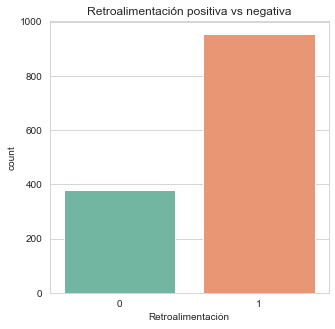

In [16]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

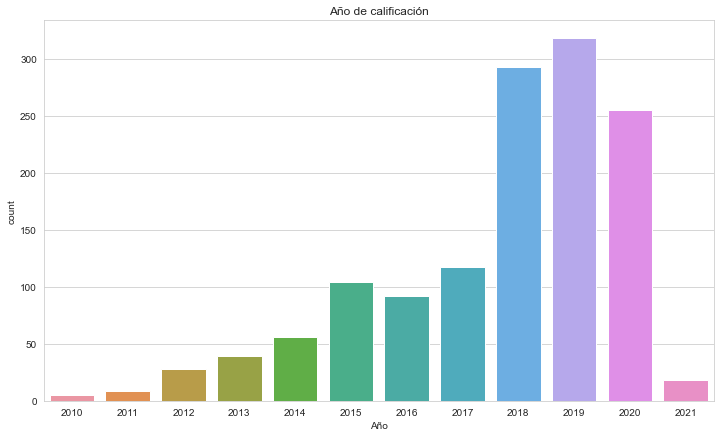

In [17]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

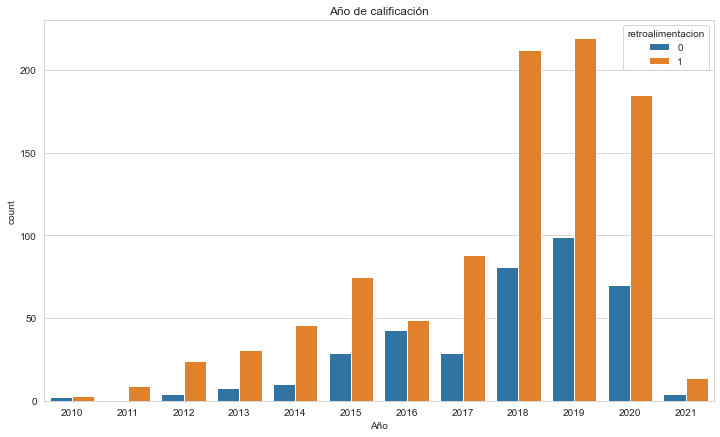

In [18]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

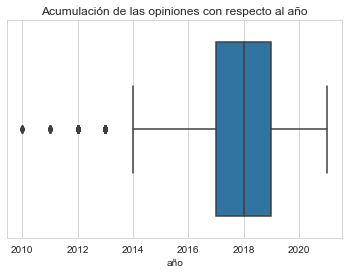

In [19]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [20]:
print("*****Porcentaje de opiniones por año*****")
TOTAL = BW_df.shape[0]
for i in range(6,10):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 200{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))
for i in range(10,22):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 20{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))   

*****Porcentaje de opiniones por año*****

año 2006 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2007 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2008 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2009 porcentaje de opiniones: 0.00000% 
es un total de 0

año 2010 porcentaje de opiniones: 0.37481% 
es un total de 5

año 2011 porcentaje de opiniones: 0.67466% 
es un total de 9

año 2012 porcentaje de opiniones: 2.09895% 
es un total de 28

año 2013 porcentaje de opiniones: 2.92354% 
es un total de 39

año 2014 porcentaje de opiniones: 4.19790% 
es un total de 56

año 2015 porcentaje de opiniones: 7.79610% 
es un total de 104

año 2016 porcentaje de opiniones: 6.89655% 
es un total de 92

año 2017 porcentaje de opiniones: 8.77061% 
es un total de 117

año 2018 porcentaje de opiniones: 21.96402% 
es un total de 293

año 2019 porcentaje de opiniones: 23.83808% 
es un total de 318

año 2020 porcentaje de opiniones: 19.11544% 
es un total de 255

año 2021 p

In [21]:
BW_df[785:790]

,opinion,mes,año,retroalimentacion
785,lugar acogedor,4,2020,1
786,Ame lugar súper cálido empleados eficientes ex...,4,2019,1
787,Cerca museos lugar ideal alojarse si busca con...,4,2018,1
788,encanta siempre voy CDMX hospedo ahí Cómodo li...,4,2019,1
789,Buena atencion lugar bien ubicado aseo excelen...,4,2019,1


In [22]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["opinion"][i]
    else:
        malas += BW_df["opinion"][i]

In [23]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

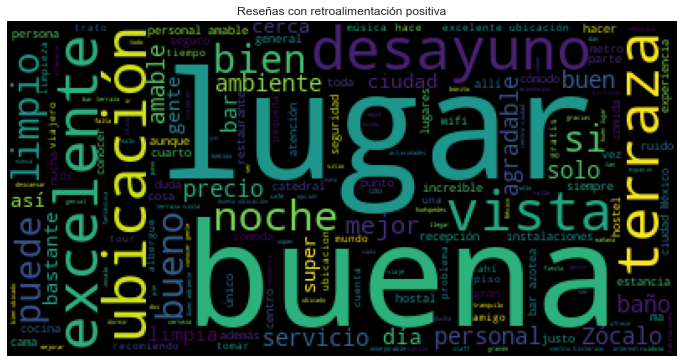

In [24]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

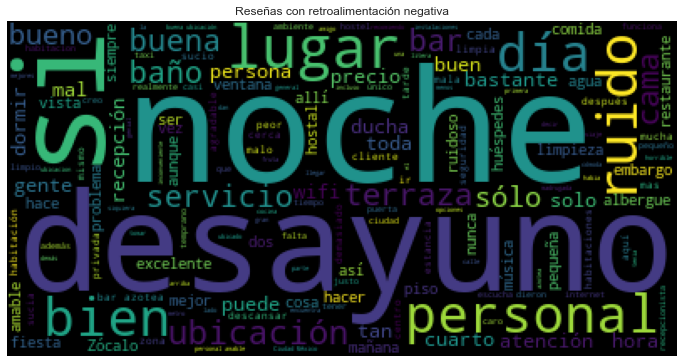

In [25]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [26]:
# Guardamos la información pre procesada
BW_df.to_csv("BW_preprocesado_todos_los_datos.csv")

In [27]:
# Cargamos los datos
maps_bruto = pd.read_csv("./Opiniones_maps.csv", encoding = "utf8")
trip_bruto = pd.read_csv("./Opiniones_trip.csv", encoding = "utf8")

In [28]:
original_df = pd.concat([maps_bruto, trip_bruto])

In [29]:
maps_bruto.head(1)

,Unnamed: 0,Usuario,Fecha,Descripción,Calificacion
0,0,Félix Coutiño,hace 6 meses en Google,Simplemente de mis mejores experiecias de hosp...,5/5


In [30]:
trip_bruto.head(1)

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_30,septiembre de 2019,viajera029,El hostal está detrás de la Catedral y tiene 2...


In [31]:
maps_bruto.dropna(inplace = True)
trip_bruto.dropna(inplace = True)

In [32]:
maps_bruto.drop("Unnamed: 0", axis = 1, inplace = True)

In [33]:
# Calificaciones
calificaciones_maps = []
calificaciones_trip = []

for cali_maps in maps_bruto["Calificacion"]:
    calificaciones_maps.append(int(cali_maps[0]))


for cali_trip in trip_bruto["calificacion"]:
    calificaciones_trip.append(int(cali_trip[-2]))

In [34]:
maps_bruto["Calificacion"] = calificaciones_maps
trip_bruto["calificacion"] = calificaciones_trip

In [35]:
caliifcaciones_unidas = calificaciones_maps + calificaciones_trip
calificaciones = []

uno = []
dos = []
tres = []
cuatro = []
cinco = []

for calificacion in caliifcaciones_unidas:
    if calificacion <= 5:
        calificaciones.append(calificacion)
    else:
        calificaciones.append(5)
        
    if calificacion == 5:
        cinco.append(calificacion)
    elif calificacion == 4:
        cuatro.append(calificacion)
    elif calificacion == 3:
        tres.append(calificacion)
    elif calificacion == 2:
        dos.append(calificacion)
    elif calificacion == 1:
        uno.append(calificacion)
    

Text(0.5, 1.0, 'Histograma de calificaciones')

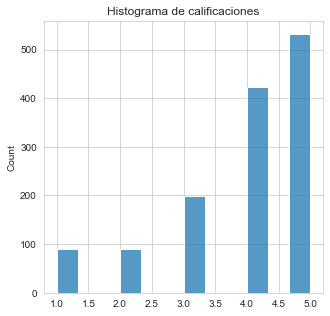

In [36]:
plt.figure(figsize = (5,5))
sns.histplot(calificaciones)
plt.title("Histograma de calificaciones")

In [37]:
# Pocerntaje de calificación
TOTAL_OPINIONES = len(calificaciones)
print("Porcentaje con calificación {} es {:.2f}%".format(1, (len(uno)/TOTAL_OPINIONES)*100))   
print("Porcentaje con calificación {} es {:.2f}%".format(2, (len(dos)/TOTAL_OPINIONES)*100))   
print("Porcentaje con calificación {} es {:.2f}%".format(3, (len(tres)/TOTAL_OPINIONES)*100))   
print("Porcentaje con calificación {} es {:.2f}%".format(4, (len(cuatro)/TOTAL_OPINIONES)*100))   
print("Porcentaje con calificación {} es {:.2f}%".format(5, (len(cinco)/TOTAL_OPINIONES)*100))   
    
print("\nEs bueno 28.41%")    
print("Debe mejorar 71.59%")

Porcentaje con calificación 1 es 6.82%
Porcentaje con calificación 2 es 6.75%
Porcentaje con calificación 3 es 14.84%
Porcentaje con calificación 4 es 31.71%
Porcentaje con calificación 5 es 39.88%

Es bueno 28.41%
Debe mejorar 71.59%


In [38]:
# Opiniones buenas

In [39]:
maps_bruto[maps_bruto["Calificacion"] >= 4]["Descripción"]

0      Simplemente de mis mejores experiecias de hosp...
2      Excelente, gracias para la hospitalidad y la a...
3      Muy cerca al zocalo y el trato del personal mu...
4      Excelente atención, aunque solo dure 1 noche ,...
5      La ubicación es inmejorable, las habitaciones ...
                             ...                        
925                                            Accesible
926                                  Me gustó la terraza
927                           siempre limpio y agradable
928    El ambiente, el trato, las instalaciones son m...
929                                        Me encantó !!
Name: Descripción, Length: 687, dtype: object

In [40]:
trip_bruto[trip_bruto["calificacion"] >= 4]["opinion"]

2      Es la tercera vez que me hospedo, las habitaci...
3      La ubicación es de lo mejor! A poca distancia ...
5      El hostal está situado en una gran ubicación, ...
6      Este hostal está situado en una fantástica ubi...
8      Este era mi primer día en DF. y yo disfrutamos...
                             ...                        
398    Lo mejor de este hostel es la ubicación, justo...
399    Estuve alojada la primer semana de Abril duran...
400    El mejor hostel en el cual me hospedé durante ...
401    Estuve el fin de semana pasado hospedada aquí ...
403    Mi novio y yo no estuvimos hospedados en el ho...
Name: opinion, Length: 268, dtype: object

In [41]:
maps_bruto["Descripción"][317]

'Excelente hostal.'

In [42]:
maps_bruto["Calificacion"][300:320]

300    5
301    5
302    3
303    5
304    4
305    4
306    3
307    5
308    4
309    2
310    5
311    2
312    4
313    5
314    5
315    4
316    5
317    5
318    5
319    5
Name: Calificacion, dtype: int64

In [43]:
# Opiniones malas

In [44]:
maps_bruto[maps_bruto["Calificacion"] < 4]["Descripción"]

1      Atención: Realmente mala, el que recibe en la ...
10     Se escucha todo, las habitaciones tienen goter...
14     El desayuno esta muy limitado a pesar de que b...
19     Deficiente servicio de agua  caliente en habit...
20     La atencion en el desayuno pesima, te sirven d...
                             ...                        
897    Es bueno aunque las literas donde duermes son ...
898    Mala atención, lugar sucio y problemas de segu...
910                                   Linda opción en Df
911    El costo es elevado para el tipo de habitación...
922                               El servicio es nefasto
Name: Descripción, Length: 243, dtype: object

In [45]:
trip_bruto[trip_bruto["calificacion"] < 4]["opinion"]

0      El hostal está detrás de la Catedral y tiene 2...
1      El hotel huele horrible a caño, los baños suci...
4      El lugar queda en una muy buena ubicación, al ...
7      Mundo joven Catedral está excelentemente ubica...
12     Lo unico bueno: la ubicacion, pero hay mas hos...
                             ...                        
378    Paré sólo x una noche. Para empezar: desde el ...
381    El bueffet corresponde al precio, osea malón, ...
382    No lo recomiendo si vas en parejas. Las habita...
394    Nos hemos alojado tres noches en dicho hostel,...
402    El hostel es bastante gradable, las habitacion...
Name: opinion, Length: 136, dtype: object

In [46]:
maps_bruto["Descripción"][12]

'Excelente servicio al cliente, ubicación perfecta, uso de protocolos de salud que nos dio seguridad en todo momento!'

In [52]:
# Opiniones buenas

In [54]:
maps_bruto[maps_bruto["Calificacion"] >= 4]["Descripción"]

0      Simplemente de mis mejores experiecias de hosp...
2      Excelente, gracias para la hospitalidad y la a...
3      Muy cerca al zocalo y el trato del personal mu...
4      Excelente atención, aunque solo dure 1 noche ,...
5      La ubicación es inmejorable, las habitaciones ...
                             ...                        
925                                            Accesible
926                                  Me gustó la terraza
927                           siempre limpio y agradable
928    El ambiente, el trato, las instalaciones son m...
929                                        Me encantó !!
Name: Descripción, Length: 687, dtype: object

In [55]:
trip_bruto[trip_bruto["calificacion"] >= 4]["opinion"]

2      Es la tercera vez que me hospedo, las habitaci...
3      La ubicación es de lo mejor! A poca distancia ...
5      El hostal está situado en una gran ubicación, ...
6      Este hostal está situado en una fantástica ubi...
8      Este era mi primer día en DF. y yo disfrutamos...
                             ...                        
398    Lo mejor de este hostel es la ubicación, justo...
399    Estuve alojada la primer semana de Abril duran...
400    El mejor hostel en el cual me hospedé durante ...
401    Estuve el fin de semana pasado hospedada aquí ...
403    Mi novio y yo no estuvimos hospedados en el ho...
Name: opinion, Length: 268, dtype: object

In [56]:
# Encontrar la palabra desayuno en las criticas malas

In [133]:
desayuno_maps = maps_bruto.loc[maps_bruto["Descripción"].str.contains("amable ")]

In [134]:
desayuno_maps[desayuno_maps["Calificacion"] >= 4]

,Usuario,Fecha,Descripción,Calificacion
0,Félix Coutiño,hace 6 meses en Google,Simplemente de mis mejores experiecias de hosp...,5
16,Gabriela Cortés,hace 3 meses en Google,"Cómodo y limpio, excelente ubicación. Muy amab...",4
23,Ingrid Prieto,hace 4 meses en Google,"La atención es muy buena, el personal es muy a...",5
31,Star Dust,hace 6 meses en Google,"Tiene una excelente ubicación, el personal es ...",4
62,Mydli Jnor,un año atrás en Google,Cómodo para dormir y muy amable el personal,4
86,Odium Veritas,un año atrás en Google,"En general, un lugar muy agradable para hosped...",4
92,nancy ramos,un año atrás en Google,"El lugar es comodo con buenas instalaciones, e...",4
127,Carlos Alan Gracia,un año atrás en Google,Excelente lugar donde puedes conocer a persona...,5
227,David Ch,2 años atrás en Google,"Encantado con mi habitación, comoda, tranquila...",5
229,ruben,un año atrás en Google,Todo muy bien el. Personal amable buen desayuno,5


In [136]:
desayuno_maps["Descripción"][16]

'Cómodo y limpio, excelente ubicación. Muy amable su personal.'